In [1]:
import sys, os
sys.path.insert(0,"/home/zhi/SULI21")
import quasim as qua
import numpy as np
import pandas as pd
from scipy import optimize

In [2]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [3]:
QT = qua.QuaTel()
BSC = qua.BSC_process("/home/zhi/SULI21/bsc5.dat")
#Output as [[star_num1,RA1,DEC1,S1],[star_num2,RA2,DEC2,S2],....] 
#in rad and Jy, S is in V-band
BSC.pos_s[882]

array([8.86000000e+02, 7.83936450e-01, 7.16161922e-01, 1.60361970e+01])

In [4]:
lam = 0.55*10**(-6)

#A bunch of telescope positions
#[RA,DEC,RADIUS] in rad and meter
pos_t_EW = [[-1.3,0.1,6.4*10**(6)],[-1.30003,0.1,6.39995*10**(6)]]   #SEPARATED BY E-W
pos_t_NS = [[-1.3,0.1,6.4*10**(6)],[-1.3,0.10003,6.40002*10**(6)]]
pos_t_SE = [[-1.3,0.1,6.4*10**(6)],[-1.30002,0.10002,6.399977*10**(6)]]

#NEW YORK COORD but the overall baseline is E-W, with B ~ 270m
#pos_t_NY = [[-1.3,0.71,6.0*10**(6)],[-1.300016,0.7099713,6.0002*10**(6)]]  
pos_t_NY = [[-1.3,0.71,6.4*10**(6)],[-1.30004,0.71,6.4*10**(6)]]  
#[RA,DEC,S] in rad and Jy for flux density
pos = BSC.BSC_filter(pos_t_NY,3)
print(pos.shape)
T = 30.0  #Period of observation[sec]
print(pos)

(18, 2, 4)
[[[1.14500000e+03 9.82656730e-01 4.27033587e-01 6.93587701e+01]
  [1.14200000e+03 9.81202289e-01 4.20857060e-01 1.20531728e+02]]

 [[1.14900000e+03 9.85354718e-01 4.25297954e-01 1.03062669e+02]
  [1.14200000e+03 9.81202289e-01 4.20857060e-01 1.20531728e+02]]

 [[1.15600000e+03 9.87536380e-01 4.17977267e-01 7.74642613e+01]
  [1.14200000e+03 9.81202289e-01 4.20857060e-01 1.20531728e+02]]

 [[1.14900000e+03 9.85354718e-01 4.25297954e-01 1.03062669e+02]
  [1.14500000e+03 9.82656730e-01 4.27033587e-01 6.93587701e+01]]

 [[1.15600000e+03 9.87536380e-01 4.17977267e-01 7.74642613e+01]
  [1.14900000e+03 9.85354718e-01 4.25297954e-01 1.03062669e+02]]

 [[1.16500000e+03 9.92590562e-01 4.20711616e-01 2.58881719e+02]
  [1.14900000e+03 9.85354718e-01 4.25297954e-01 1.03062669e+02]]

 [[1.16500000e+03 9.92590562e-01 4.20711616e-01 2.58881719e+02]
  [1.15600000e+03 9.87536380e-01 4.17977267e-01 7.74642613e+01]]

 [[1.17800000e+03 9.99906401e-01 4.19809863e-01 1.28558674e+02]
  [1.16500000e+

In [5]:
num, t, baseline, excess = QT.get_num_photon(pos,pos_t_NY,lam,T,'pos')

In [164]:
print(baseline)  #[X,Y,Z]'
l = 15
pos[l][1]-pos[l][0]
pos[15]

[-187.06684164  -51.92865253    0.        ]


array([[5.05500000e+03, 3.50785000e+00, 9.58563914e-01, 9.57417549e+01],
       [5.05400000e+03, 3.50778455e+00, 9.58626940e-01, 4.49884866e+02]])

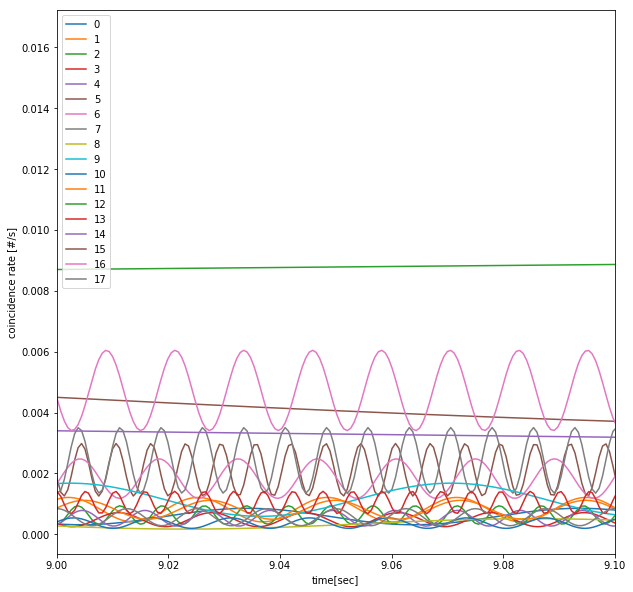

In [6]:
N = t.size
plt.figure(figsize=(10,10))
plt.xlim([9.0,9.1])
#plt.ylim([0.0,5.0*10**(-9)])
for i in range(18):
    plt.plot(t[N/4:N/2],num[i,N/4:N/2],label= i)
    
plt.xlabel('time[sec]');plt.ylabel('coincidence rate [#/s]')
plt.legend()

#There is one shows 0 number of coincidence because its current position is outside of 
# telescope plane. Need longer period of observation so Earth is rotated by sufficiently.

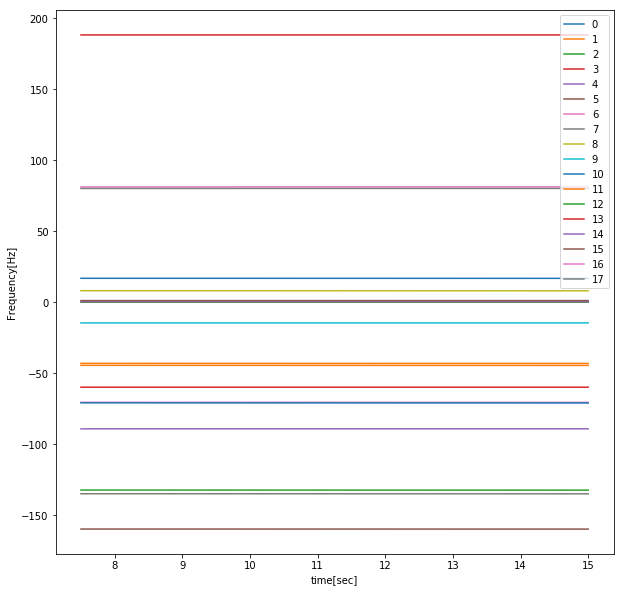

In [7]:
w_t, new_t = QT.freq_func(num,t,excess)

N = t.size-1
plt.figure(figsize=(10,10))
#plt.xlim([9.0,9.1])
#plt.ylim([0.0,5.0*10**(-9)])
for i in range(18):
    plt.plot(new_t[N/4:N/2],w_t[i,N/4:N/2],label= i)
    
plt.xlabel('time[sec]');plt.ylabel('Frequency[Hz]')
plt.legend()

In [14]:
%matplotlib notebook

In [160]:
# Lets plot the sources and telescopes visually

r = 0.8
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:2.0*pi:100j, 0.0:1.0*pi:100j]
x = r*sin(theta)*cos(phi)
y = r*sin(theta)*sin(phi)
z = r*cos(theta)

PHIs, THETAs = pos[:][:,:,1], np.pi/2 - pos[:][:,:,2]
s_xx = 3*sin(THETAs)*cos(PHIs)    #(N,2)
s_yy = 3*sin(THETAs)*sin(PHIs)
s_zz = 3*cos(THETAs)
L = len(s_xx)

t_xx = 1.0*sin(np.pi/2 - 0.71)*cos(-1.3)
t_yy = 1.0*sin(np.pi/2 - 0.71)*sin(-1.3)
t_zz = 1.0*cos(pi/2. - 0.71)

#print(s_xx)
#print(s_yy)

[[ 1.51497286  1.52251362]
 [ 1.51002747  1.52251362]
 [ 1.51000496  1.52251362]
 [ 1.51002747  1.51497286]
 [ 1.51000496  1.51002747]
 [ 1.49659412  1.51002747]
 [ 1.49659412  1.51000496]
 [ 1.48037358  1.49659412]
 [ 1.0992533   1.11383964]
 [ 1.11983668  1.12033259]
 [ 0.0863687   0.10979748]
 [-0.57413835 -0.55709347]
 [-1.02182077 -1.02181769]
 [-1.4869467  -1.48985436]
 [-2.55740872 -2.5573648 ]
 [-1.60973602 -1.60963195]
 [-1.60359747 -1.60963195]
 [-1.60359747 -1.60973602]]
[[ 2.27178492  2.27591449]
 [ 2.27765802  2.27591449]
 [ 2.28844905  2.27591449]
 [ 2.27765802  2.27178492]
 [ 2.28844905  2.27765802]
 [ 2.29325459  2.27765802]
 [ 2.29325459  2.28844905]
 [ 2.30507067  2.29325459]
 [ 2.53743952  2.54246975]
 [ 2.65949153  2.65785865]
 [ 2.32492944  2.32286492]
 [ 2.86742104  2.86677655]
 [ 2.33330298  2.33329594]
 [ 1.09202123  1.11397903]
 [ 1.19285627  1.19290372]
 [-0.61743629 -0.61727552]
 [-0.62541805 -0.61727552]
 [-0.62541805 -0.61743629]]


<IPython.core.display.Javascript object>


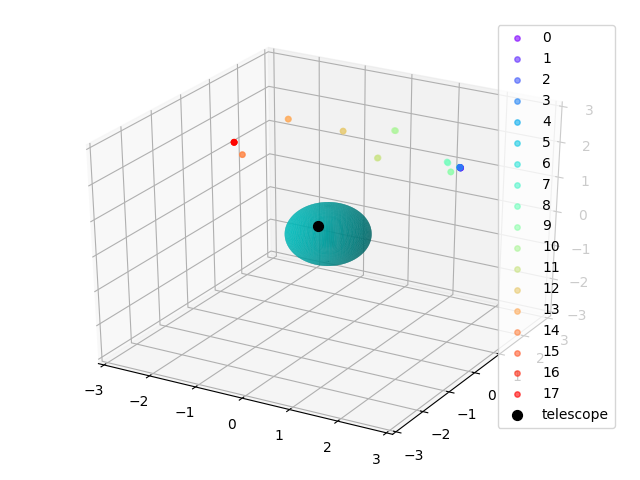

In [162]:
colors = cm.rainbow(np.linspace(0,1,L))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, color='c', alpha=0.8, linewidth=0)

for i in range(L):
    ax.scatter(s_xx[i],s_yy[i],s_zz[i],alpha = 0.6, color=colors[i],s=15,label=i)

ax.scatter(t_xx,t_yy,t_zz, color = 'k', alpha = 1.0, s=50, label='telescope')
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_zlim([-3,3])
plt.tight_layout()
plt.legend()
plt.show()

In [17]:
# Find fringe rate, oscilation freq, FFT
f_rate, fft, fft_freq, freq = QT.get_rates(num, t)

In [18]:
print("osc_frequency:", freq)
print( "coincidence_rate:", f_rate)

('osc_frequency:', array([1.67666321e+01, 4.31332444e+01, 1.32433060e+02, 5.99332098e+01,
       8.92331494e+01, 1.59833004e+02, 7.05665212e+01, 1.35066388e+02,
       8.03331678e+00, 1.46333032e+01, 7.09331871e+01, 4.46665746e+01,
       6.66665293e-02, 1.88166279e+02, 2.99999382e-01, 1.09999773e+00,
       8.11998326e+01, 8.00998349e+01]))
('coincidence_rate:', array([0.0005835 , 0.00080901, 0.00063437, 0.00048108, 0.00052737,
       0.0021199 , 0.00183064, 0.00242907, 0.00034168, 0.00113502,
       0.00036717, 0.00080528, 0.01153067, 0.00104459, 0.00311654,
       0.0048175 , 0.00472704, 0.00056186]))


<IPython.core.display.Javascript object>


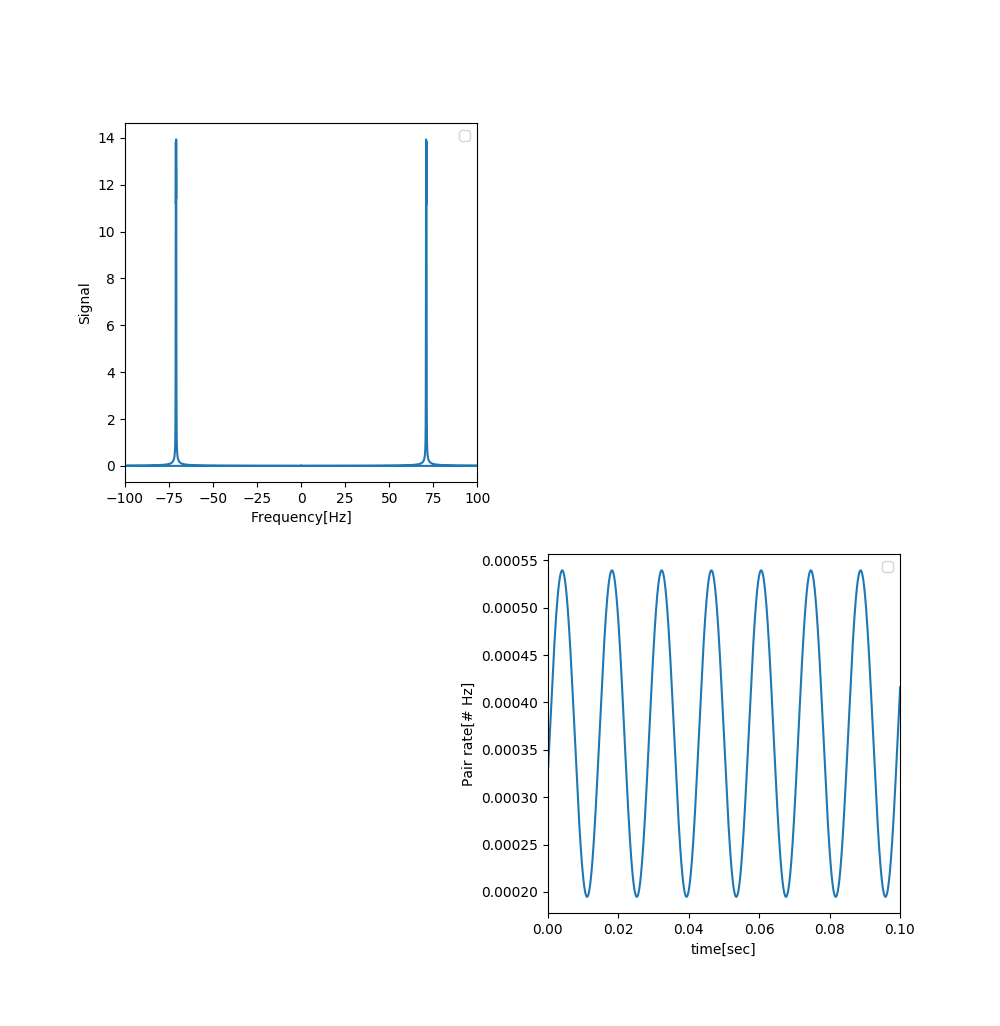

In [135]:
k = 10     #check for k-th pair of stars
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(fft_freq[:],fft[k,:])
plt.xlim([-100.0,100.0])
plt.xlabel('Frequency[Hz]');plt.ylabel('Signal')
plt.legend()
plt.subplot(2,2,4)
plt.plot(t,num[k,:])
plt.xlim([0,0.1])
plt.xlabel('time[sec]');plt.ylabel('Pair rate[# Hz]')
plt.legend()

<IPython.core.display.Javascript object>


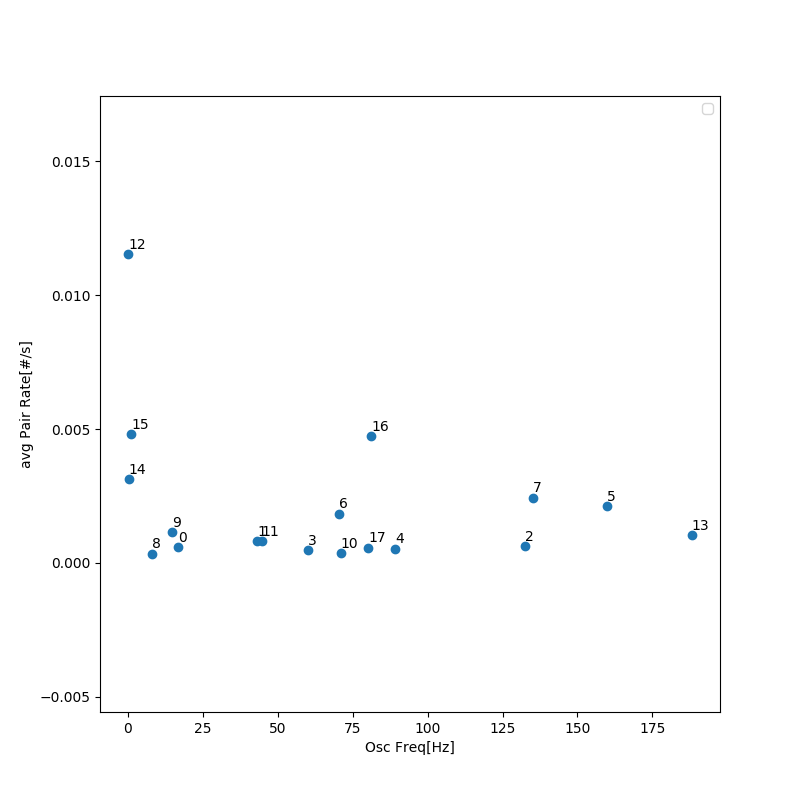

In [147]:
colors = cm.rainbow(np.linspace(0,1,17))
n = np.arange(0,18)

plt.figure(figsize=(8,8))
plt.scatter(freq, f_rate)
for i, label in enumerate(n):
    plt.annotate(label, (freq[i],f_rate[i]+0.0002), size=10)
    
for i in range(18):
    ax.scatter(freq[i],f_rate[i],alpha = 0.6, color=colors[i],s=10,label=i)
plt.xlabel("Osc Freq[Hz]");plt.ylabel("avg Pair Rate[#/s]")
plt.legend()
plt.show()

In [ ]:
# test for individual pairs:

In [7]:
# LET PAIR #15 run for a long time and see what happens:
T_15 = 5000.0
num_p15, t_p15, baseline, excess_15 = QT.get_num_photon(pos[15],pos_t_NY,lam,T_15,'pos')

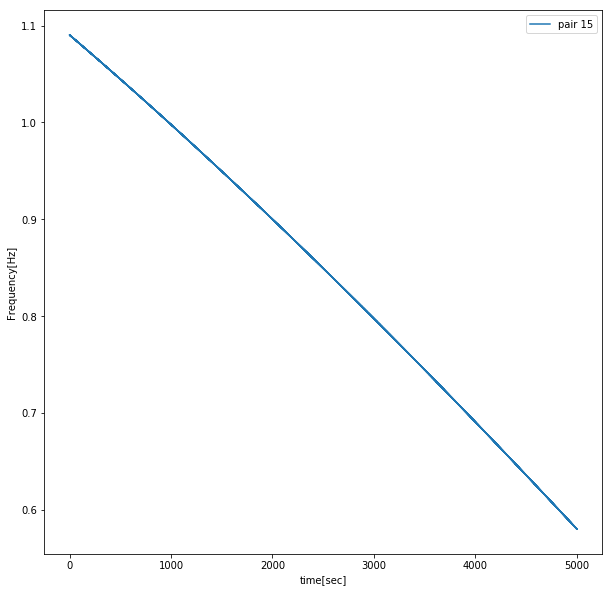

In [8]:
w_t_15, new_t_15 = QT.freq_func(num_p15,t_p15,excess_15)

N = new_t_15.size-1

plt.figure(figsize=(10,10))
plt.plot(new_t_15,w_t_15[0],label= 'pair 15')
    
plt.xlabel('time[sec]');plt.ylabel('Frequency[Hz]')
plt.legend()

In [18]:
cond = np.where((np.abs(fft_15[0]) > 50))
print(fft_freq_15[cond])
print(w_t_15[0,-1])

[ 0.57979993  0.57999993  0.58019993 ... -0.58019993 -0.57999993
 -0.57979993]
0.5802214907767723


In [11]:
f_rate_15, fft_15, fft_freq_15, freq_15 = QT.get_rates(num_p15, t_p15)

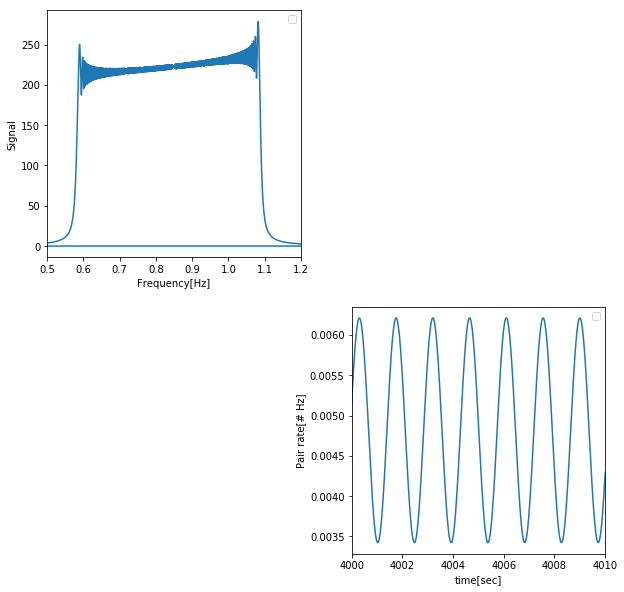

In [17]:
N = fft_15[0].size

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(fft_freq_15,np.abs(fft_15[0]))
plt.xlim([0.5,1.2])
plt.xlabel('Frequency[Hz]');plt.ylabel('Signal')
plt.legend()
plt.subplot(2,2,4)
plt.plot(t_p15,num_p15[0])
plt.xlim([4000,4010])
plt.xlabel('time[sec]');plt.ylabel('Pair rate[# Hz]')
plt.legend()

In [19]:
T_13 = 5000.0
#pos_13 = pos[13].reshape((1,2,4))
num_p13, t_p13, baseline, excess_13 = QT.get_num_photon(pos[13],pos_t_NY,lam,T_13,'pos')

pair rate = $ A(1 \pm V \cos(w(t)* t)) $  

derivative = $\mp AV \cos(\pi/2-w(t)*t) (w(t)+\frac{dw}{dt}*t) $

Find $(w(t)+\frac{dw}{dt}*t)$

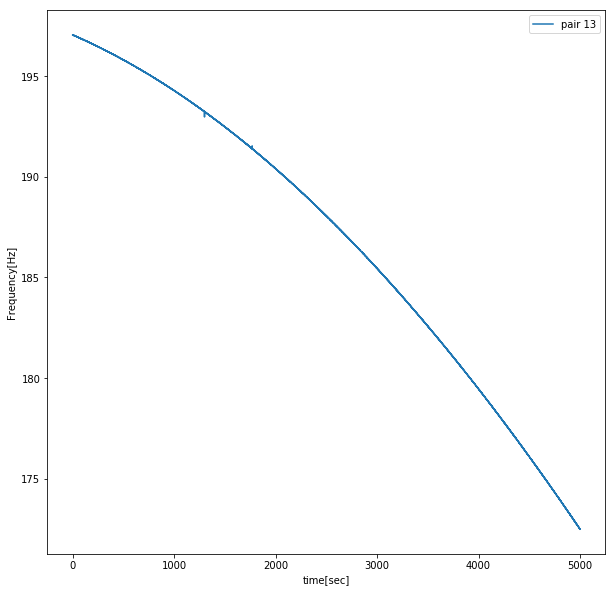

In [20]:
# find (w_t + dw/dt * t), but dw/dt is small compared to fft frequency which is simply w_t.
w_t_13, new_t_13 = QT.freq_func(num_p13,t_p13,excess_13)

N = new_t_13.size-1

plt.figure(figsize=(10,10))
plt.plot(new_t_13,w_t_13[0],label= 'pair 13')
    
plt.xlabel('time[sec]');plt.ylabel('Frequency[Hz]')
plt.legend()

In [21]:
f_rate_13, fft_13, fft_freq_13, freq_13 = QT.get_rates(num_p13, t_p13)

In [26]:
cond = np.where(abs(fft_13[0]) > 2)
print(fft_freq_13[cond][0])
print(w_t_13[0,-1])

diff = (w_t_13[0,-1] - fft_freq_13[cond][0])/5000.
diff

166.44037941700958
172.48675335759845


0.0012092747881177728

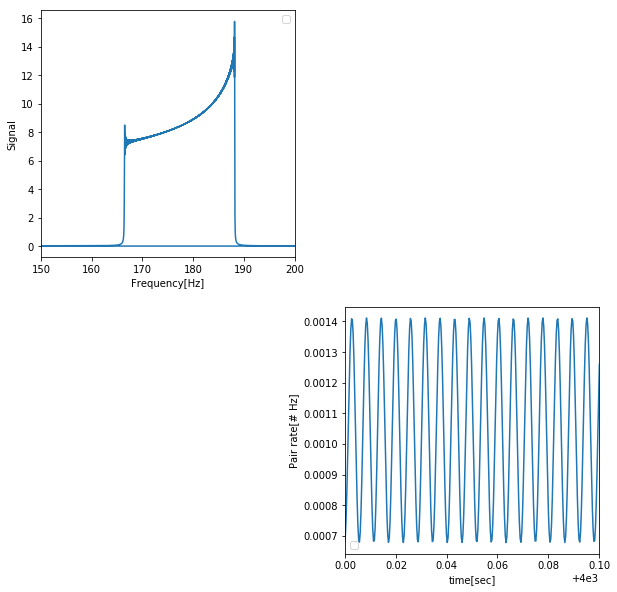

In [14]:
N = fft_13[0].size

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(fft_freq_13,fft_13[0])
plt.xlim([150,200])
plt.xlabel('Frequency[Hz]');plt.ylabel('Signal')
plt.legend()
plt.subplot(2,2,4)
plt.plot(t_p13,num_p13[0])
plt.xlim([4000,4000.1])
plt.xlabel('time[sec]');plt.ylabel('Pair rate[# Hz]')
plt.legend()

In [5]:
T_16 = 5000.0
#pos_16 = pos[16].reshape((1,2,4))
num_p16, t_p16, baseline, excess_16 = QT.get_num_photon(pos[16],pos_t_NY,lam,T_16,'pos')

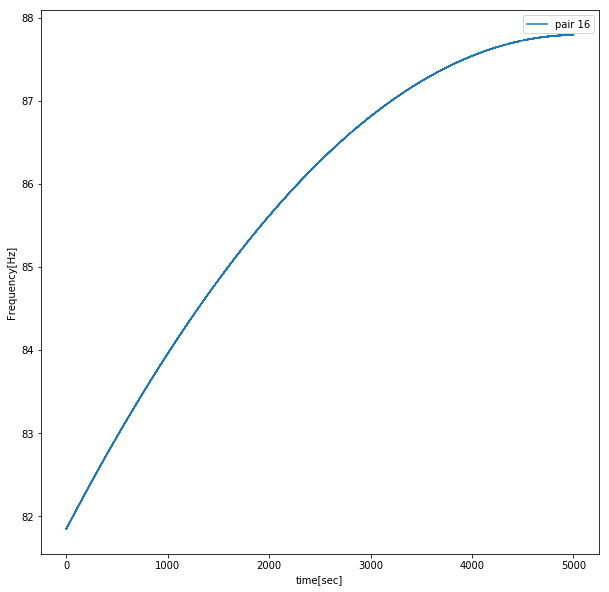

In [6]:
w_t_16, new_t_16 = QT.freq_func(num_p16,t_p16,excess_16)
t = np.arange(5000)
N = new_t_16.size-1

plt.figure(figsize=(10,10))
plt.plot(new_t_16,w_t_16[0],label= 'pair 16')
#plt.plot(t,cosine_func(t,Cpar[0],Cpar[1],Cpar[2],Cpar[3]), label='pair 16 fit')
plt.xlabel('time[sec]');plt.ylabel('Frequency[Hz]')
plt.legend()


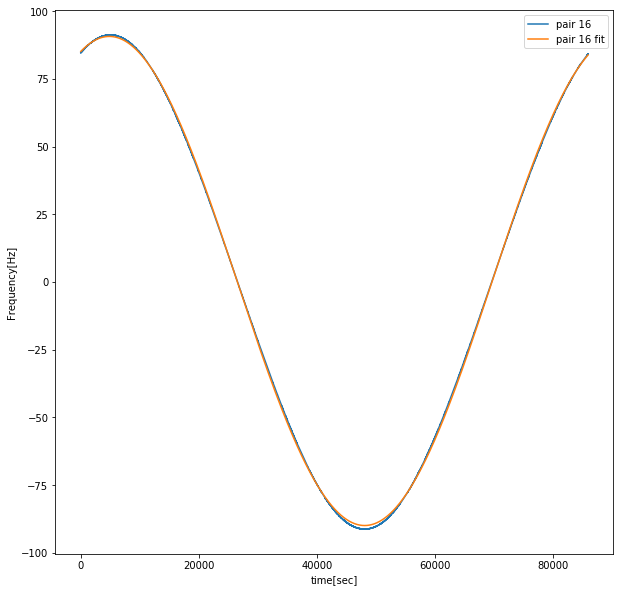

In [11]:
w_t_16, new_t_16 = QT.freq_func(num_p16,t_p16,excess_16)
t = np.arange(86000)
N = new_t_16.size-1

plt.figure(figsize=(10,10))
plt.plot(new_t_16,w_t_16[0],label= 'pair 16')
plt.plot(t,cosine_func(t,Cpar[0],Cpar[1],Cpar[2],Cpar[3]), label='pair 16 fit')
plt.xlabel('time[sec]');plt.ylabel('Frequency[Hz]')
plt.legend()


In [9]:
# doing some simple fititng
def cosine_func(t,a,b,c,d):
    return a*np.cos(b*t+c)+d

Cpar,Ccov = optimize.curve_fit(cosine_func,new_t_16,w_t_16[0], \
                             p0=[90,7.28*10**(-5),0.,0.27])

In [10]:
Cpar

array([ 9.02559747e+01,  7.25921211e-05, -3.51392917e-01,  3.80020947e-01])

In [6]:
f_rate_16, fft_16, fft_freq_16, freq_16 = QT.get_rates(num_p16, t_p16)

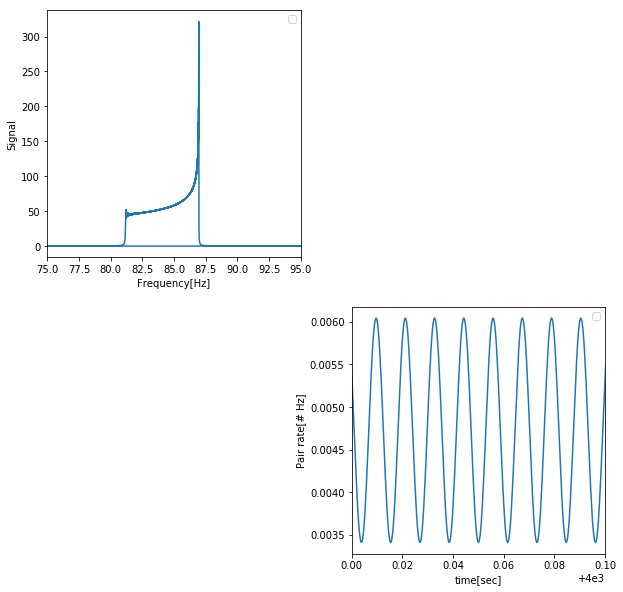

In [10]:
N = fft_16[0].size

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(fft_freq_16,fft_16[0])
plt.xlim([75,95])
plt.xlabel('Frequency[Hz]');plt.ylabel('Signal')
plt.legend()
plt.subplot(2,2,4)
plt.plot(t_p16,num_p16[0])
plt.xlim([4000,4000.1])
plt.xlabel('time[sec]');plt.ylabel('Pair rate[# Hz]')
plt.legend()

In [5]:
T_5 = 86000.0
num_p5, t_p5, baseline, excess_5 = QT.get_num_photon(pos[5],pos_t_NY,lam,T_5,'pos')

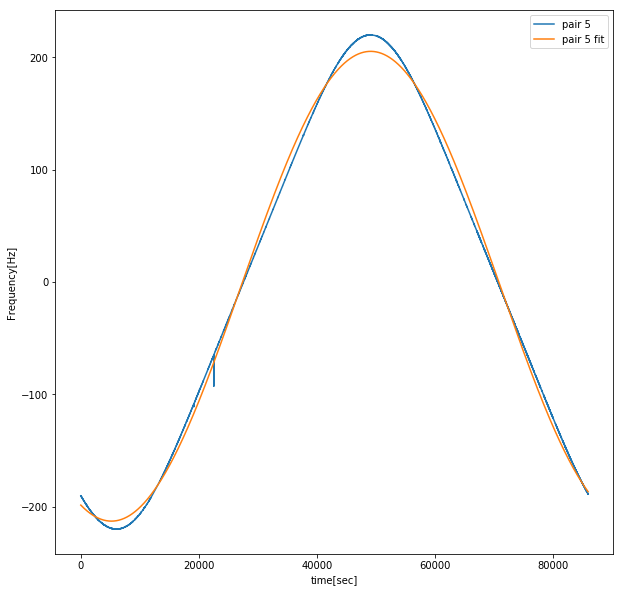

In [9]:
w_t_5, new_t_5 = QT.freq_func(num_p5,t_p5,excess_5)
t = np.arange(86000)
N = new_t_5.size-1


plt.figure(figsize=(10,10))
plt.plot(new_t_5,w_t_5[0],label= 'pair 5')
plt.plot(t,cosine_func(t,Cpar_5[0],Cpar_5[1],Cpar_5[2],Cpar_5[3]), label='pair 5 fit')
plt.xlabel('time[sec]');plt.ylabel('Frequency[Hz]')
plt.legend()


In [7]:
def cosine_func(t,a,b,c,d):
    return a*np.cos(b*t+c)+d

Cpar_5,Ccov_5 = optimize.curve_fit(cosine_func,new_t_5,w_t_5[0], \
                             p0=[200,7.28*10**(-5),0.,0])

In [8]:
Cpar_5 

array([-2.09208062e+02,  7.14949338e-05, -3.71571549e-01, -3.77863423e+00])